# DL Assignment 12
## Sargun Singh (102115078) 4O1D

**Q1** *Write a program to Generate MNIST Digits using Deep Autoencoders in Keras.*

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

In [3]:
# Normalize and flatten the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28 * 28)  # Flatten into vectors of size 784
x_test = x_test.reshape(-1, 28 * 28)

In [4]:
# Define the size of encoding
encoding_dim = 32  # Size of the encoded representation

# Define the autoencoder architecture
# Input layer
input_img = Input(shape=(784,))

In [5]:
# Encoder
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

In [6]:
# Decoder
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [7]:
# Autoencoder Model
autoencoder = Model(input_img, decoded)

# Encoder Model
encoder = Model(input_img, encoded)

In [8]:
# Decoder Model
encoded_input = Input(shape=(encoding_dim,))
decoder_layer1 = autoencoder.layers[-3](encoded_input)
decoder_layer2 = autoencoder.layers[-2](decoder_layer1)
decoder_layer3 = autoencoder.layers[-1](decoder_layer2)
decoder = Model(encoded_input, decoder_layer3)

In [9]:
# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [10]:
# Train the autoencoder
history = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.3351 - val_loss: 0.1716
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1615 - val_loss: 0.1376
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1352 - val_loss: 0.1254
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1255 - val_loss: 0.1197
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1198 - val_loss: 0.1153
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1152 - val_loss: 0.1111
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1118 - val_loss: 0.1083
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1093 - val_loss: 0.1055
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1063 - val_loss: 0.1034
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1041 - val_loss: 0.1025
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1028 - val_loss: 0.1005
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/s

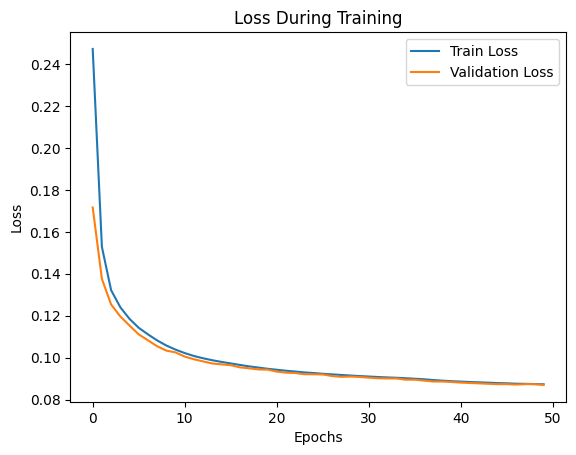

In [11]:
# Visualize the loss during training
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
# Encode and decode some digits to test the autoencoder
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


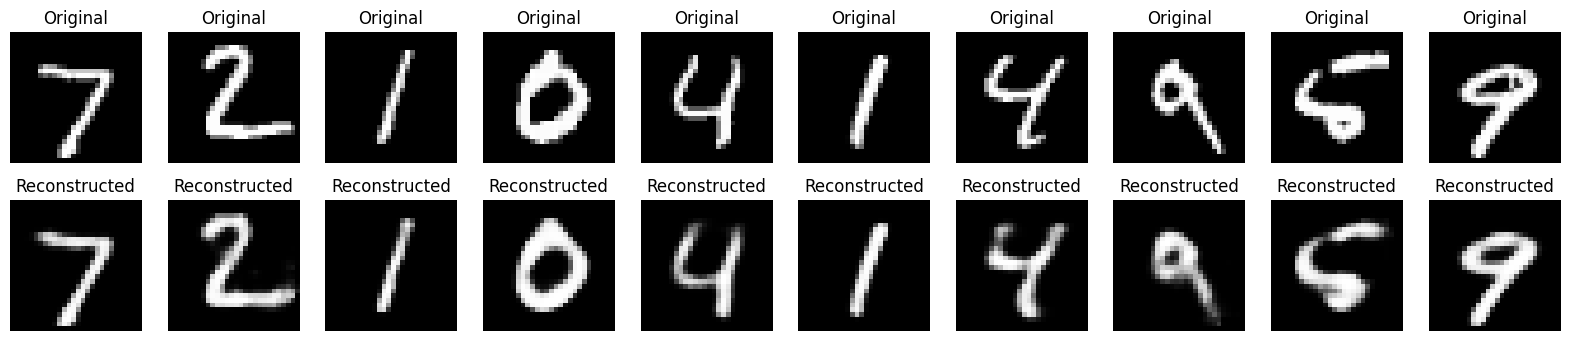

In [13]:
# Display original and reconstructed images
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Display reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()

In [14]:
# Generate new images from random latent space vectors
random_latent_vectors = np.random.normal(size=(10, encoding_dim))  # Random latent vectors
generated_images = decoder.predict(random_latent_vectors)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


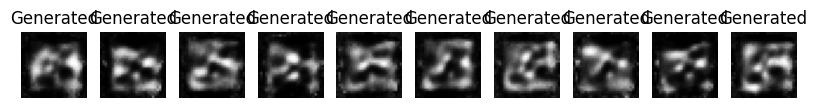

In [18]:
# Display generated images
plt.figure(figsize=(10, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
    plt.title("Generated")
    plt.axis('off')
plt.show()